<a href="https://colab.research.google.com/github/sabasyed00/innomatics_assignments/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import scipy as sp
from scipy import stats
import math
import random
import statistics as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
random.seed = 54


In [69]:
data=pd.read_excel('AMEO.xlsx')


In [70]:
data

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [71]:
data.shape

(3998, 39)

In [72]:
data.head(25)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,train,1027655,300000,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.00,state board,5086,2,B.Tech/B.E.,electronics and communication engineering,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,train,947847,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,train,912934,400000,2014-07-01,2015-07-01 00:00:00,mechanical engineer,Bangalore,m,1992-05-27,92.00,cbse,2010,91.00,cbse,1757,1,B.Tech/B.E.,mechanical engineering,8.58,1757,0,Tamil Nadu,2016,545,555,590,0.829585,-1,-1,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,train,552574,600000,2013-07-01,present,electrical engineer,Noida,m,1991-09-17,90.00,cbse,2009,91.20,cbse,13,1,B.Tech/B.E.,electronics and electrical engineering,85.03,13,1,Delhi,2013,615,670,530,0.694479,735,366,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,train,1203363,230000,2014-07-01,present,project engineer,Kolkata,m,1993-06-13,77.00,cbse,2010,72.20,cbse,8640,2,B.Tech/B.E.,electronics and communication engineering,78.00,8640,1,West Bengal,2014,605,565,545,0.493596,385,324,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


In [73]:
data.tail(25)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3973,train,755067,335000,2013-08-01,present,programmer analyst,-1,m,1990-05-20,66.85,state board,2008,59.11,state board,1906,2,B.Tech/B.E.,information technology,82.10,1906,1,West Bengal,2013,520,660,620,0.793581,495,-1,-1,-1,-1,-1,-1,0.2718,-0.1206,-1.2196,-0.36120,-0.6692
3974,train,641821,180000,2013-06-01,2014-07-01 00:00:00,quality engineer,-1,m,1991-06-09,70.80,cbse,2008,65.20,cbse,1622,2,B.Tech/B.E.,electronics and instrumentation engineering,72.50,1622,0,Madhya Pradesh,2013,405,520,530,0.376060,315,300,-1,-1,-1,-1,-1,-0.0154,-1.1196,0.6248,-0.48790,-1.4356
3975,train,1240207,300000,2014-07-01,2015-04-01 00:00:00,game developer,Noida,m,1991-06-03,86.00,cbse,2009,76.00,cbse,13210,2,B.Tech/B.E.,computer science & engineering,63.00,13210,0,Uttar Pradesh,2014,720,455,535,0.968237,605,-1,-1,-1,-1,-1,-1,0.5591,0.5454,0.1637,0.39950,0.4805
3976,train,1006997,300000,2015-01-01,present,graduate engineer trainee,Navi Mumbai,f,1992-09-13,64.20,icse,2010,64.10,icse,3449,2,B.Tech/B.E.,information technology,71.00,3449,0,Madhya Pradesh,2014,510,505,595,0.978799,455,-1,561,-1,-1,-1,-1,0.4155,0.0459,0.0100,0.27270,0.0973
3977,train,217036,415000,2011-09-01,present,software engineer,Mumbai,m,1990-02-27,62.00,0,2007,61.00,0,4948,2,B.Tech/B.E.,information technology,60.00,4948,1,Rajasthan,2011,535,385,335,0.342315,365,-1,-1,-1,-1,-1,-1,-1.9629,-0.2793,-0.3440,0.53230,-0.1295
3978,train,1274658,320000,2013-08-01,2014-01-01 00:00:00,software engineer,Hyderabad,f,1991-04-24,89.70,icse,2009,86.70,icse,7685,2,B.Tech/B.E.,information technology,80.00,7685,1,West Bengal,2013,720,675,570,-1.000000,-1,-1,-1,-1,-1,-1,-1,0.2718,1.2114,0.4711,-0.10760,0.8637
3979,train,212055,550000,2013-07-01,2014-04-01 00:00:00,software engineer,Bangalore,m,1989-07-22,69.16,up board,2006,65.66,up board,278,1,M.Tech./M.E.,computer engineering,77.50,278,0,Uttar Pradesh,2013,395,435,645,0.990009,655,-1,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.41480,-1.2354
3980,train,197796,150000,2011-07-01,2012-07-01 00:00:00,get,haryana,m,1986-08-05,84.00,cbse,2004,67.00,cbse,9019,2,B.Tech/B.E.,mechanical engineering,65.05,9019,0,Haryana,2011,515,575,595,0.840841,-1,-1,-1,473,-1,-1,-1,-1.4992,0.5008,-0.9245,-0.64280,-0.6035
3981,train,1077872,220000,2014-09-01,present,software engineer,Gurgaon,m,1991-12-17,53.40,cbse,2009,65.40,cbse,3879,2,B.Tech/B.E.,computer science & engineering,71.20,3879,0,Madhya Pradesh,2013,560,420,645,0.953900,575,-1,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386
3982,train,553436,160000,2012-05-01,2014-06-01 00:00:00,java software engineer,Secunderabad,m,1989-06-10,83.00,ssc,2006,66.00,boardofintermediate,6072,2,MCA,computer application,81.00,6072,0,Andhra Pradesh,2012,555,595,515,0.864685,525,-1,-1,-1,-1,-1,-1,-0.0154,0.5454,0.6248,-1.24860,1.0554


In [74]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [75]:
data.info

<bound method DataFrame.info of      Unnamed: 0      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01              present   
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1    

In [76]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01              present   
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1  

In [77]:
data.columns=data.columns.str.lower()


In [78]:
data.dtypes


unnamed: 0                       object
id                                int64
salary                            int64
doj                      datetime64[ns]
dol                              object
designation                      object
jobcity                          object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
collegeid                         int64
collegetier                       int64
degree                           object
specialization                   object
collegegpa                      float64
collegecityid                     int64
collegecitytier                   int64
collegestate                     object
graduationyear                    int64
english                           int64
logical                           int64


In [79]:
data['dol'].replace('present','2015-12-31',inplace=True)
data['dol']=pd.to_datetime(data['dol']) #convert date time format

In [80]:
data

,unnamed: 0,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [81]:
categorical=['designation','jobcity','gender','10board','12board','degree','collegetier','specialization','collegecitytier','collegestate']
for ca in categorical:
    data[ca]=data[ca].astype('category')


In [82]:
data.dtypes

unnamed: 0                       object
id                                int64
salary                            int64
doj                      datetime64[ns]
dol                      datetime64[ns]
designation                    category
jobcity                        category
gender                         category
dob                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
collegeid                         int64
collegetier                    category
degree                         category
specialization                 category
collegegpa                      float64
collegecityid                     int64
collegecitytier                category
collegestate                   category
graduationyear                    int64
english                           int64
logical                           int64


In [83]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
id,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
collegeid,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
collegegpa,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
collegecityid,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
graduationyear,3998.0,2012.105803,31.857271,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03
english,3998.0,501.649075,104.940021,180.0000,425.000000,500.000000,570.000000,8.750000e+02


In [84]:
#preprocessing
LJ= data[~(data['dol']>data['doj'])].shape[0]
print(f'dol is greater than doj for {LJ} observations.')

dol is greater than doj for 55 observations.


In [85]:
data=data.drop(data[~(data['dol'] > data['doj'])].index)

In [86]:
data['gender'].replace({'f':'Female','m':'Male'},inplace=True)
data.head()


,unnamed: 0,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [87]:
(data.loc[data['collegegpa']<=10,'collegegpa']/10)*100

7       85.8
138     66.3
788     68.0
1419    68.5
1439    80.7
1767    75.6
2151    69.5
2229    81.3
2293    93.0
2662    88.8
2691    88.9
3308    64.5
Name: collegegpa, dtype: float64

In [88]:
print((data==0).sum() [(data==0).sum()>0])


10board             349
12board             358
collegecitytier    2761
graduationyear        1
dtype: int64


In [89]:
(data==-1).sum()[(data==-1).sum()>0]/len(data)*100


jobcity                  11.361907
domain                    6.137459
computerprogramming      21.836165
electronicsandsemicon    71.392341
computerscience          77.605884
mechanicalengg           94.040071
electricalengg           96.094344
telecomengg              90.565559
civilengg                98.934821
dtype: float64

The cols cannot have values of 0 or -1.

In [90]:
data.drop(columns=['mechanicalengg','electricalengg','telecomengg','civilengg'],inplace=True)

In [91]:
data['10board'] = data['10board'].replace({0:np.nan})
data['12board'] = data['12board'].replace({0:np.nan})
data['graduationyear'] = data['graduationyear'].replace({0:np.nan})
data['jobcity'] = data['jobcity'].replace({-1:np.nan})
data['domain'] = data['domain'].replace({-1:np.nan})
data['electronicsandsemicon'] = data['electronicsandsemicon'].replace({-1:0})
data['computerscience'] = data['computerscience'].replace({-1:0})
data['computerprogramming'] = data['computerprogramming'].replace({-1:np.nan})

In [92]:
#Replacing missing values
data['10board'].fillna(data['10board'].mode()[0], inplace = True)
data['12board'].fillna(data['12board'].mode()[0], inplace = True)
data['graduationyear'].fillna(data['graduationyear'].mode()[0], inplace = True)
data['jobcity'].fillna(data['jobcity'].mode()[0], inplace = True)

In [93]:
data['domain'].fillna(data['domain'].median(), inplace = True)
data['computerprogramming'].fillna(data['computerprogramming'].median(), inplace=True)


In [94]:
data.head

<bound method NDFrame.head of      unnamed: 0      id   salary        doj        dol  \
0         train  203097   420000 2012-06-01 2015-12-31   
1         train  579905   500000 2013-09-01 2015-12-31   
2         train  810601   325000 2014-06-01 2015-12-31   
3         train  267447  1100000 2011-07-01 2015-12-31   
4         train  343523   200000 2014-03-01 2015-03-01   
...         ...     ...      ...        ...        ...   
3992      train  344407   800000 2014-04-01 2015-04-01   
3993      train   47916   280000 2011-10-01 2012-10-01   
3995      train  355888   320000 2013-07-01 2015-12-31   
3996      train  947111   200000 2014-07-01 2015-01-01   
3997      train  324966   400000 2013-02-01 2015-12-31   

                      designation           jobcity  gender        dob  \
0         senior quality engineer         Bangalore  Female 1990-02-19   
1               assistant manager            Indore    Male 1989-10-04   
2                systems engineer           Chennai

In [95]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state 

In [96]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','state', 'cbse', 'icse', 'andhra pradesh state board', 'up bord', 'gujarat board', 'intermideate']

In [97]:
for i in replace_list_state:
    data['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    data['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    data['12board'].replace(i,'icse',inplace=True)

data['12board'].replace(0,'n/a',inplace=True)

data['12board'].unique()

array(['state', 'icse', 'cbse'], dtype=object)

In [98]:
data.dtypes

unnamed: 0                       object
id                                int64
salary                            int64
doj                      datetime64[ns]
dol                      datetime64[ns]
designation                    category
jobcity                          object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
collegeid                         int64
collegetier                    category
degree                         category
specialization                 category
collegegpa                      float64
collegecityid                     int64
collegecitytier                category
collegestate                   category
graduationyear                  float64
english                           int64
logical                           int64


In [99]:
data['degree'].unique()

['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']
Categories (4, object): ['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']

In [100]:
specialization_freq = data['specialization'].value_counts()

In [101]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [102]:
data['specialization'] = data['specialization'].map(specialization_map)

print(data['specialization'].unique())

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


In [103]:
data['averageScore']=(data['logical']+data['quant']+data['english'])/3
print(data['averageScore'])

0       541.666667
1       695.000000
2       510.000000
3       615.000000
4       545.000000
           ...    
3992    425.000000
3993    391.333333
3995    471.666667
3996    393.333333
3997    514.666667
Name: averageScore, Length: 3943, dtype: float64


In [104]:
data['acadperf']=data['10percentage']+data['12percentage']+data['collegegpa']/3
print(data['acadperf'])

0       206.100000
1       193.753333
2       176.533333
3       194.080000
4       179.433333
           ...    
3992    153.333333
3993    128.090000
3995    170.693333
3996    172.073333
3997    161.266667
Name: acadperf, Length: 3943, dtype: float64


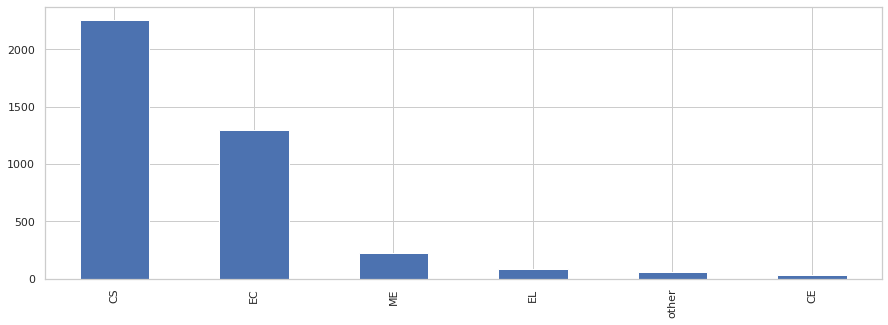

In [105]:
#univariate analysis
data['specialization'].value_counts().plot(kind='bar', figsize=(15,5))

Cs had the highest score with almost a crossing rate of 2000 followed by EC

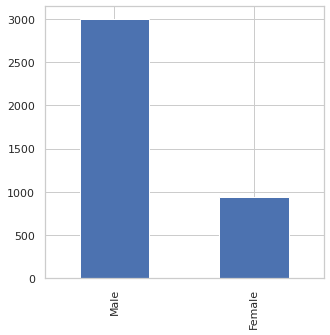

In [106]:
data['gender'].value_counts().plot(kind='bar', figsize=(5,5))
#this is a bar plot of the gender category 
#m=Male f=Female

The number of male are almost 3000 way greater than female who are under 1000

software engineer            535
software developer           262
system engineer              202
programmer analyst           139
systems engineer             117
                            ... 
human resources intern         1
human resources associate      1
staffing recruiter             0
risk investigator              0
software devloper              0
Name: designation, Length: 419, dtype: int64


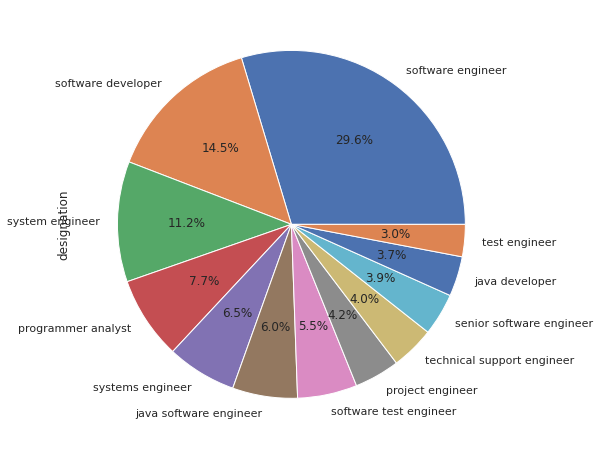

In [107]:
print(data['designation'].value_counts())    
plt.figure(figsize=(8,8))
data.designation.value_counts().iloc[:12].plot(kind='pie', autopct='%1.1f%%')
plt.show()

The pie chart shows the comparison of each designation highest being the software engineer followed by the software developer and lowest being test engineer

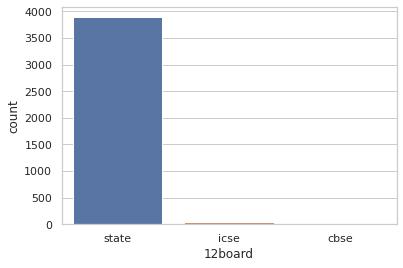

In [108]:
sns.countplot(x='12board',data=data)


Inferred from the histogram above the state board is the nost prefered board among the three


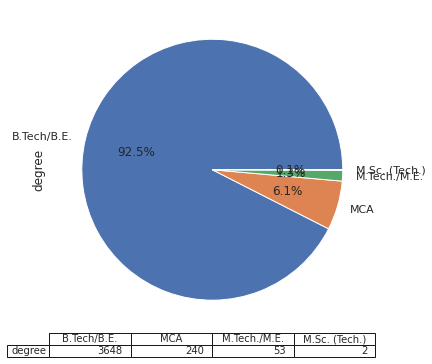

In [109]:
plt.figure(figsize=(6,6))
data.degree.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

The pie chart shows highest number of employees are undergraduates with a B.E or B.Tech degree

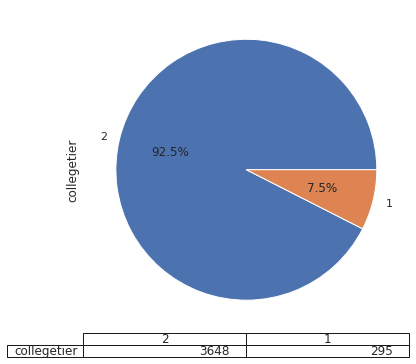

In [110]:
plt.figure(figsize=(6,6))
data.collegetier.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

Most of the employees are from tier 2 college

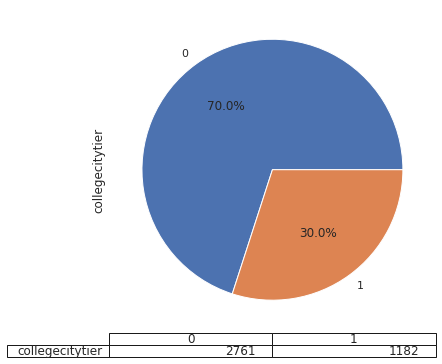

In [111]:
plt.figure(figsize=(6,6))
data.collegecitytier.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()


Uttar Pradesh        902
Karnataka            369
Tamil Nadu           363
Telangana            312
Maharashtra          257
Andhra Pradesh       222
West Bengal          192
Madhya Pradesh       189
Punjab               188
Haryana              177
Orissa               172
Rajasthan            168
Delhi                161
Uttarakhand          112
Kerala                33
Jharkhand             27
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Union Territory        5
Assam                  5
Sikkim                 3
Goa                    1
Meghalaya              1
Name: collegestate, dtype: int64


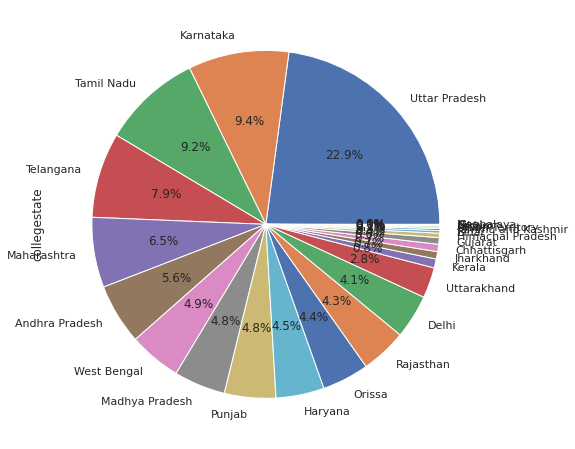

In [112]:
print(data['collegestate'].value_counts())    
plt.figure(figsize=(8,8))
data.collegestate.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

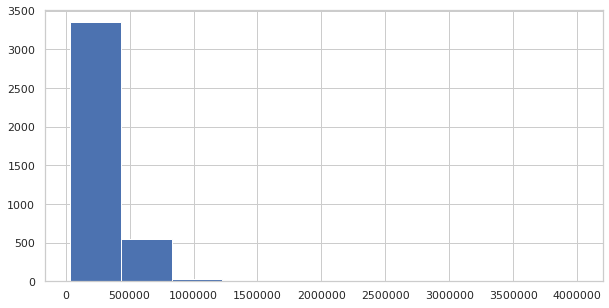

In [113]:
plt.figure(figsize = (10,5))
plt.hist(data['salary'],bins=10)
plt.ticklabel_format(style='plain')

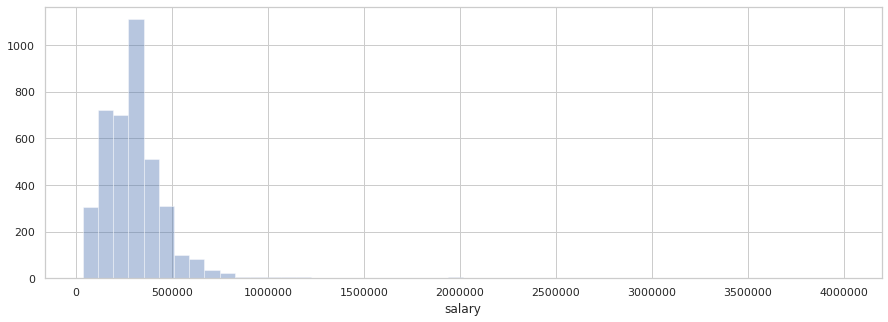

In [114]:
plt.figure(figsize=(15,5))
sns.distplot(data['salary'],kde=False)
plt.ticklabel_format(style='plain')
plt.show()

Text(0.5, 0, 'collegegpa')

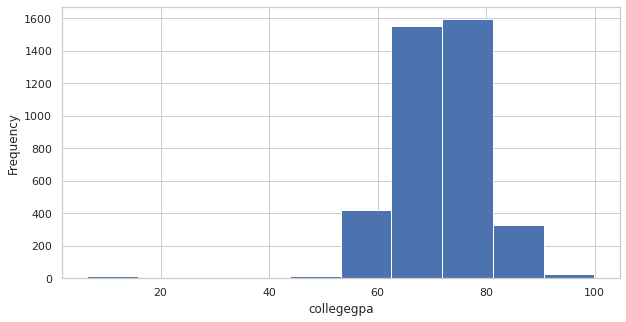

In [115]:
data['collegegpa'].plot(kind='hist', figsize=(10,5))
plt.xlabel('collegegpa')

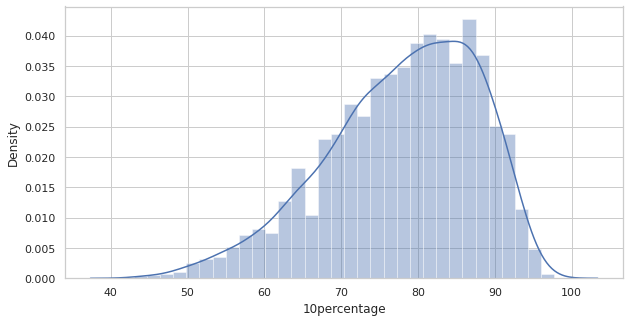


mean:  77.94655084960682
median: 79.2
mode: 0    78.0
dtype: float64


In [116]:
plt.figure(figsize=(10,5))
sns.distplot(data['10percentage'])
plt.show()
print()
print('mean: ',data['10percentage'].mean())
print('median:',data['10percentage'].median())
print('mode:',data['10percentage'].mode())

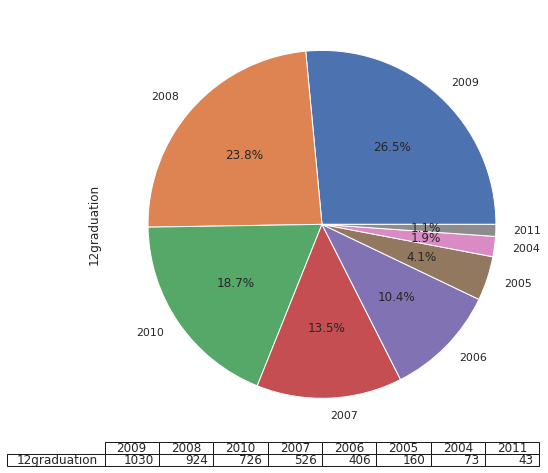

In [117]:
plt.figure(figsize=(8,8))
data['12graduation'].value_counts().iloc[:8].plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

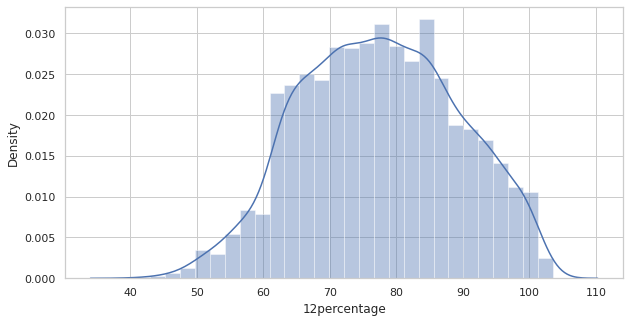



mean:  77.52561582099301
median: 77.44741484987517


In [118]:
plt.figure(figsize=(10,5))
transformed, _ = stats.boxcox(data['12percentage'])
plt.xlabel('12percentage')

sns.distplot(transformed)
plt.show()
print()
print()
print('mean: ',transformed.mean())
print('median:',np.median(transformed))

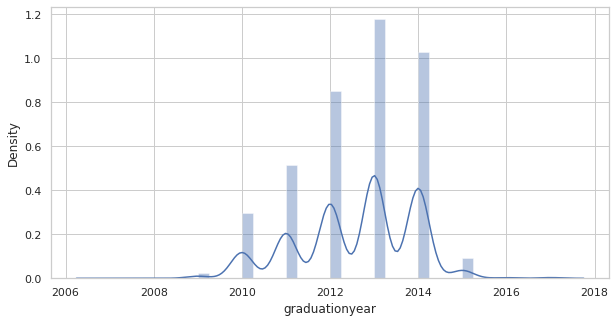


mean:  2012.5987826528024
median: 2013.0
mode: 0    2013.0
dtype: float64


In [119]:
plt.figure(figsize=(10,5))
sns.distplot(data['graduationyear'])
plt.show()
print()
print('mean: ',data['graduationyear'].mean())
print('median:',data['graduationyear'].median())
print('mode:',data['graduationyear'].mode())

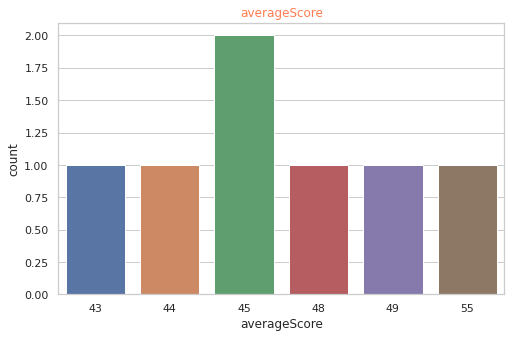

In [120]:
plt.figure(figsize=(8,5))
sns.countplot(data['averageScore'].value_counts().iloc[:7])
plt.title('averageScore',color='coral')
plt.show()

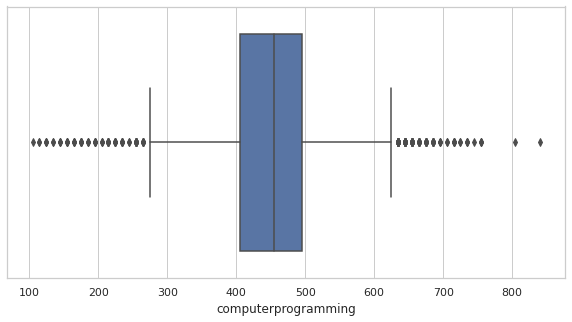

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(data['computerprogramming'])

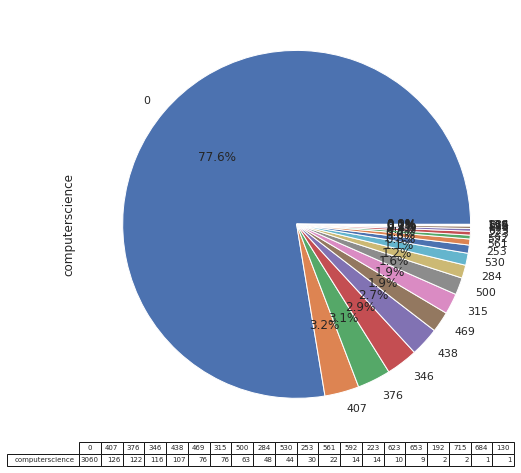

In [122]:

plt.figure(figsize=(8,8))
data.computerscience.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

[  0 466 233 366 324 266 333 356 420 260 228 388 300 292 433 196 200 164
 400 484 500 452 516 166 533 566 612 133 548]


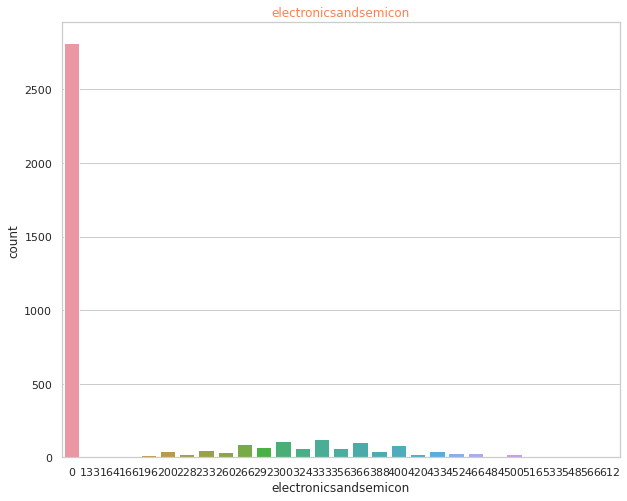

In [123]:
plt.figure(figsize=(10,8))
sns.countplot(data['electronicsandsemicon'])
plt.title('electronicsandsemicon',color='coral')
print(data['electronicsandsemicon'].unique())

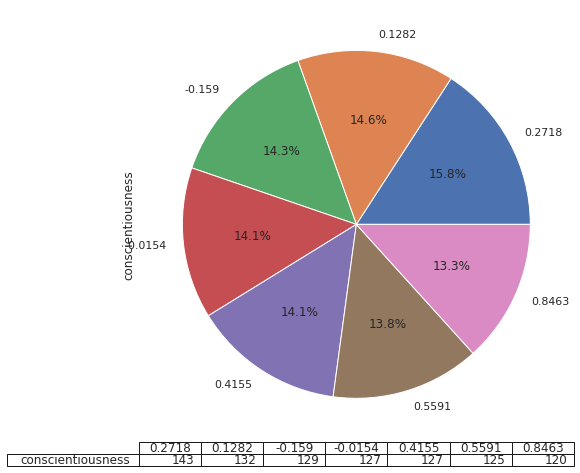

In [124]:
plt.figure(figsize=(8,8))
data.conscientiousness.value_counts().iloc[:7].plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

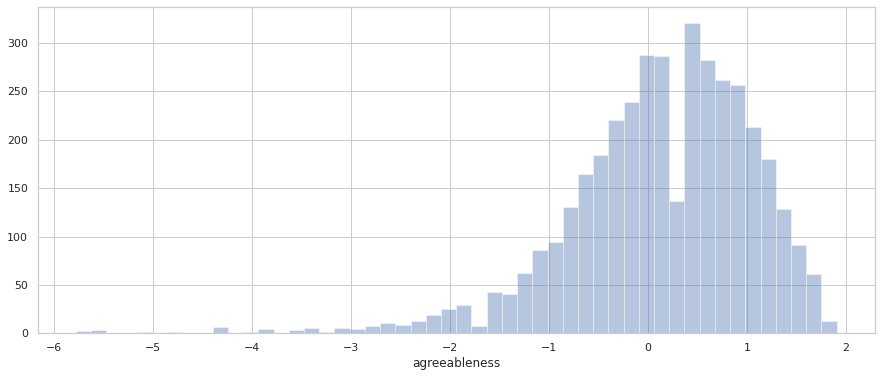

In [125]:
plt.figure(figsize=(15,6))
sns.distplot(data['agreeableness'],kde=False)
plt.show()

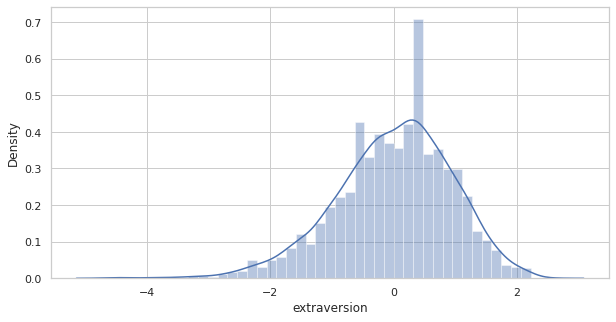

In [126]:
plt.figure(figsize=(10,5))
sns.distplot(data['extraversion'])
plt.show()

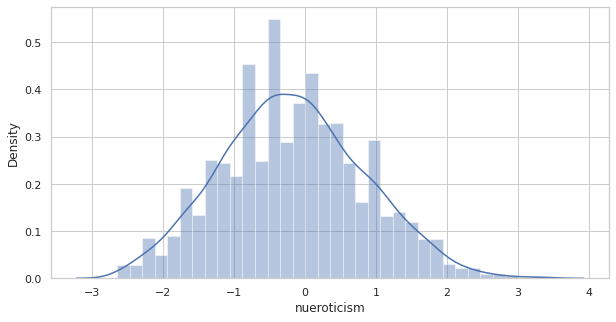

In [127]:
plt.figure(figsize=(10,5))
sns.distplot(data['nueroticism'])
plt.show()

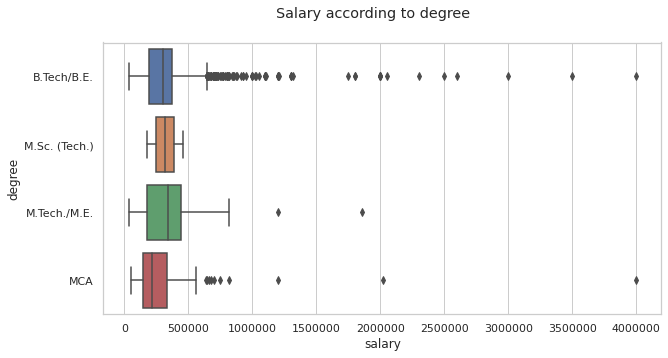

In [128]:
#Bivariate
plt.figure(figsize=(10,5))
sns.boxplot(x='salary',y='degree',data=data)
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to degree')
plt.show()

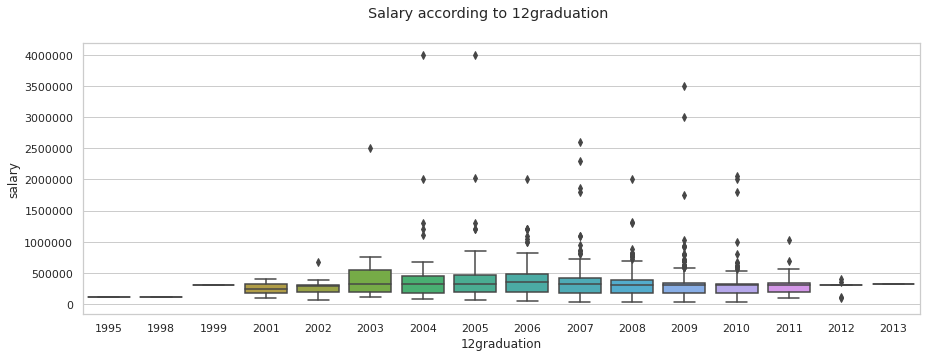

In [129]:
plt.figure(figsize=(15,5))
sns.boxplot(y='salary',x='12graduation',data=data)
plt.ticklabel_format(style='plain',axis='y')
plt.suptitle('Salary according to 12graduation')
plt.show()

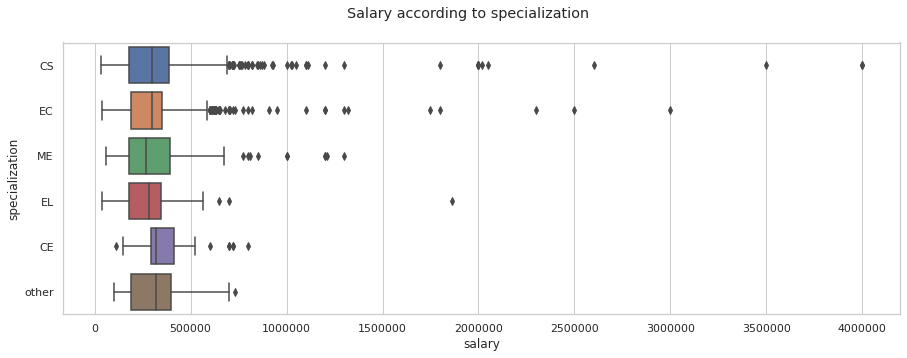

In [130]:
plt.figure(figsize=(15,5))
sns.boxplot(x='salary',y='specialization',data=data)
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to specialization')
plt.show()

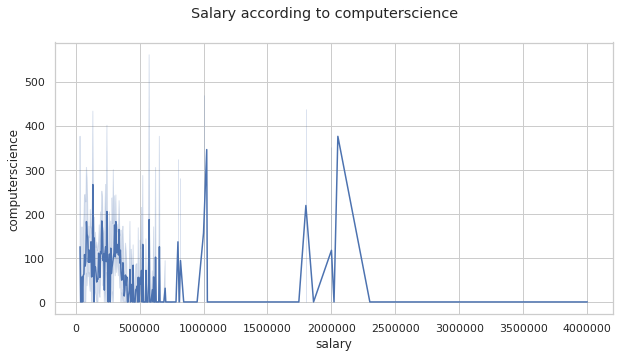

In [131]:
plt.figure(figsize=(10,5))
sns.lineplot(x = data['salary'], y = data['computerscience'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to computerscience')
plt.show()

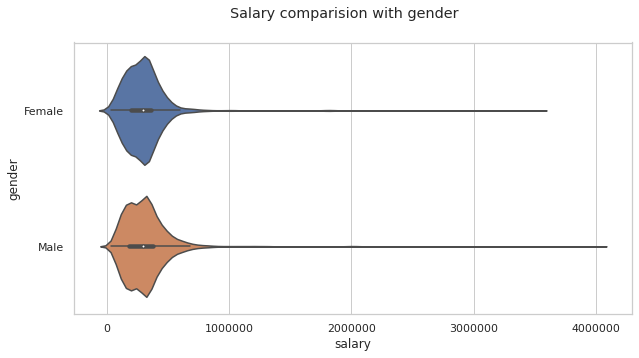

In [132]:
plt.figure(figsize=(10,5))
sns.violinplot(x = data['salary'], y = data['gender'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary comparision with gender')
plt.show()


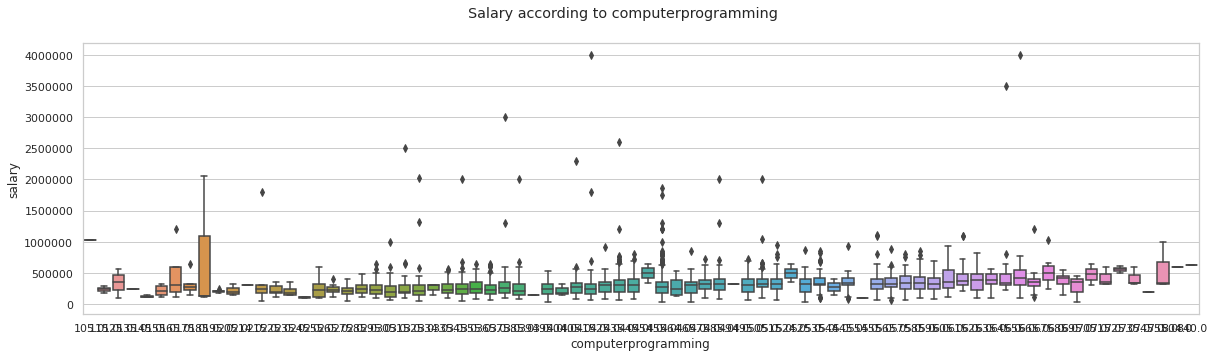

In [133]:
plt.figure(figsize=(20,5))
sns.boxplot(y='salary',x='computerprogramming',data=data)
plt.ticklabel_format(style='plain',axis='y')
plt.suptitle('Salary according to computerprogramming')
plt.show()


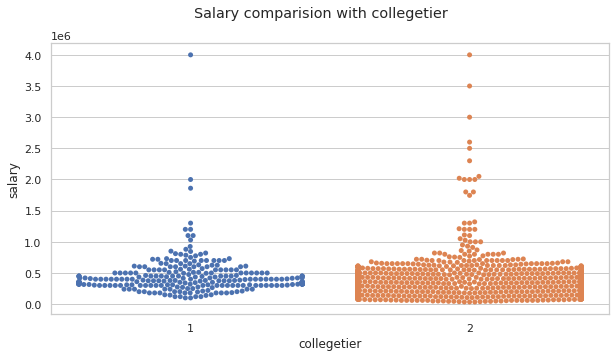

In [134]:
plt.figure(figsize=(10,5))
sns.swarmplot(y="salary", x="collegetier", data=data)
plt.suptitle('Salary comparision with collegetier')
plt.show()

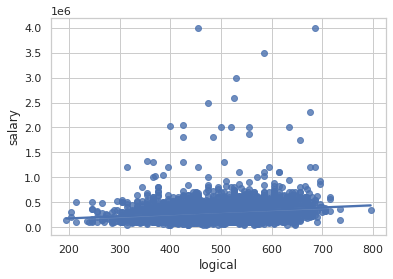

In [135]:
sns.regplot(x='logical', y='salary', data=data)

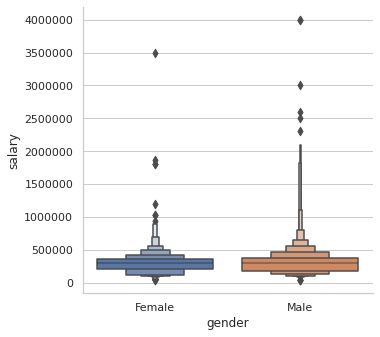

In [136]:
sns.catplot(x="gender", y="salary", kind="boxen",data=data)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

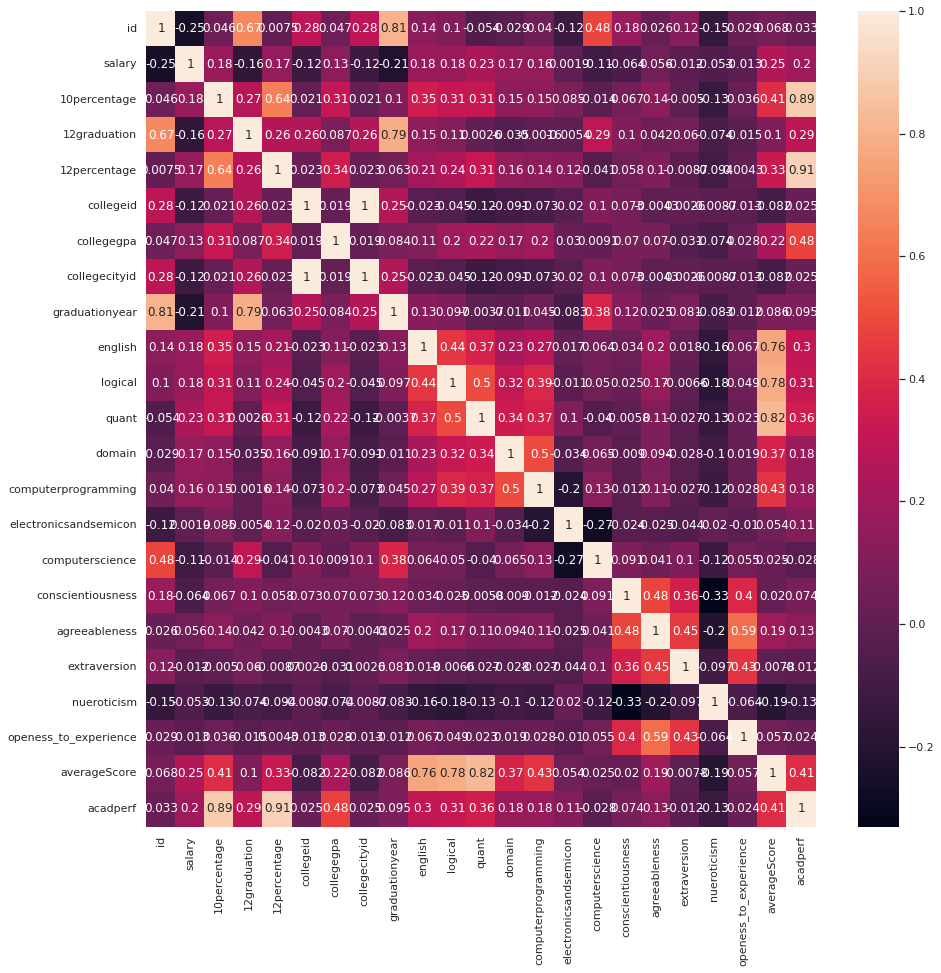

In [137]:
plt.figure(figsize=(15,15))
corrMatrix1 = data.corr()
sns.heatmap(corrMatrix1, annot=True)

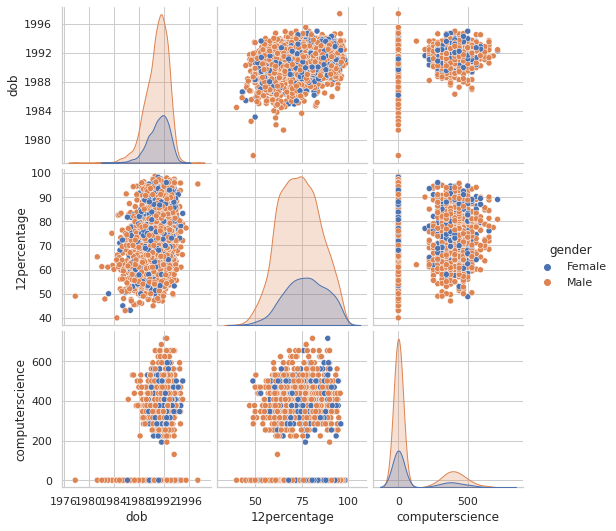

In [138]:
sns.pairplot(data=data, vars=['dob','12percentage','computerscience'],hue='gender',kind='scatter')
plt.show()

<Figure size 1080x864 with 0 Axes>

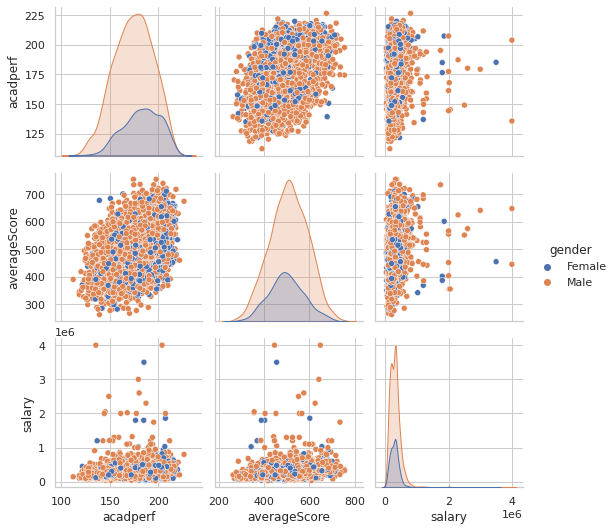

In [139]:
plt.figure(figsize=(15,12))
sns.pairplot(data=data, vars=['acadperf','averageScore','salary'],hue='gender',kind='scatter')
plt.show()